In [1]:
#setup 2D box
%run -i program/billiard_defs.py
%run -i program/analysis.py

dim = 2

pw_collision_law = 'no_slip'
# pw_collision_law = 'specular'
sl = 20
wall = [FlatWall(pos=[-sl,0], normal=[1,0], collision_law=pw_collision_law),
        FlatWall(pos=[sl,0], normal=[-1,0], collision_law=pw_collision_law),
        FlatWall(pos=[0,-sl], normal=[0,1], collision_law=pw_collision_law),
        FlatWall(pos=[0,sl], normal=[0,-1], collision_law=pw_collision_law),
       ]

#bounding box is used to make uniformly random guesses for particle positions.
#The position is then check against each wall to check if particle is inside the chamber.
bounding_box = np.array([[-sl,sl]
                         ,[-sl,sl]                         
                        ])

lab_frame = np.eye(2)   #desired frame for lab
surface_data_dict = []

In [2]:
# Setup particles for complex collisions monster

num_part = 7
mass = 7
gamma = 'uniform'  #parameter btw 0 mass at center) and sqrt(2/dim) (mass on outside shell)
radius = 1
temp = 10
# pp_collision_law = 'no_slip'
pp_collision_law = 'specular'

init_pos = [[0,0]
            ,[7,0]
            ,[-7,0]
            ,[9,9]
            ,[-9,-9]
            ,[-18,14]
            ,[-18,7]
            ]

init_vel = [[0 , 0]
            ,[-1, 0]
            ,[1, 0]
            ,[2, 2]
            ,[-2, -2]
            ,[0,1]
            ,[0,2]
            ]

In [3]:
# Run experiment
%run -i program/billiard_defs.py
%run -i program/analysis.py

max_steps = 10
max_distort = 10  # Used after experiment to determine whether to interpolate between collisions
# If so, how much distortion to allow.  Must be 0-100, smaller <-> more frames and smoother, but longer 
# processing and larger files.  Anything other than 0-100 will turn off smoothing

part = Particles(wall, num=num_part, mass=mass, gamma=gamma
                 ,radius=radius, temp=temp, collision_law=pp_collision_law
                 ,pos=init_pos  # comment this line out for random init pos
                 , vel=init_vel  # comment this line out for random init vel
                )

init(wall, part)

for step in range(max_steps):
    do_the_evolution()

re_t, re_pos, re_vel, re_rot, re_spin = smoother(max_distort)
S, P, D, M = re_pos.shape

print("Finished it all.  There are {} frames in this animation of {} particles.".format(S, P))

Finished it all.  There are 96 frames in this animation of 7 particles.


<IPython.core.display.Javascript object>


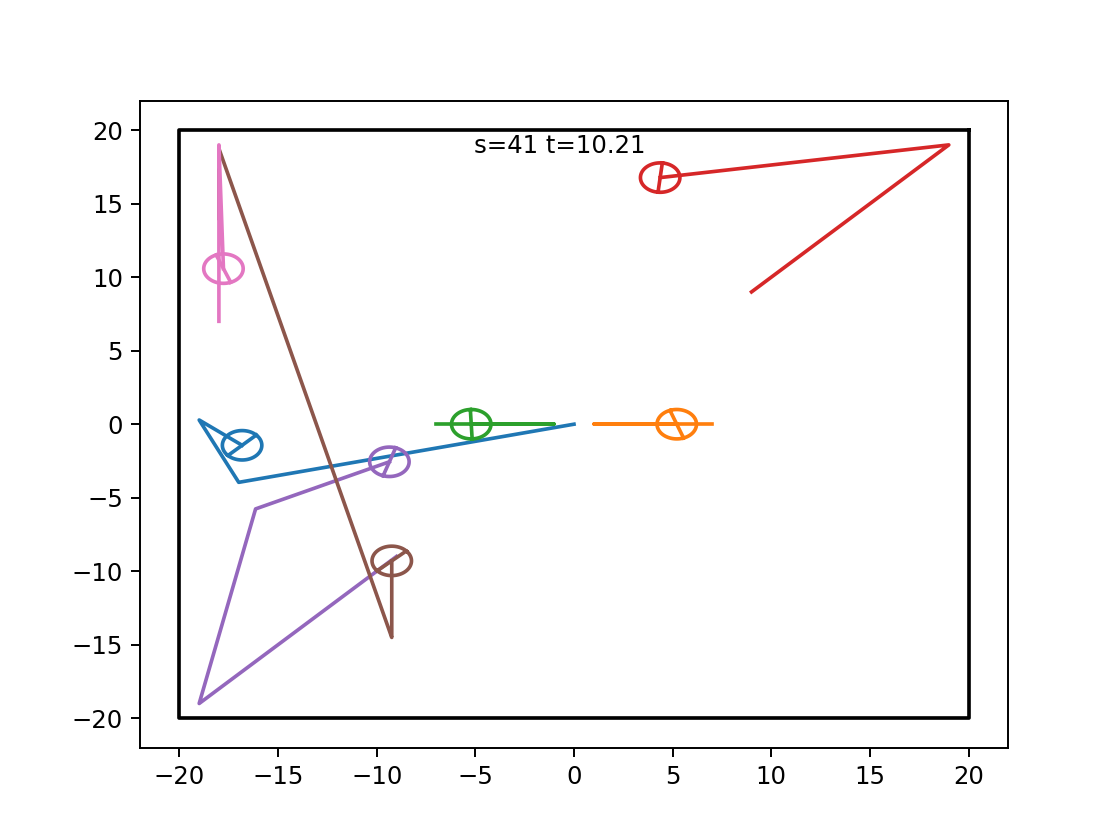

In [4]:
# animate 2D box
%run -i program/billiard_defs.py
%run -i program/analysis.py

run_time = 10
%matplotlib notebook
S, P, D, M = re_pos.shape
anim = animate_2d_box(run_time)
display(anim)
anim.save('box_2D.mp4', fps= S/run_time, extra_args=['-vcodec', 'libx264']);

<IPython.core.display.Javascript object>


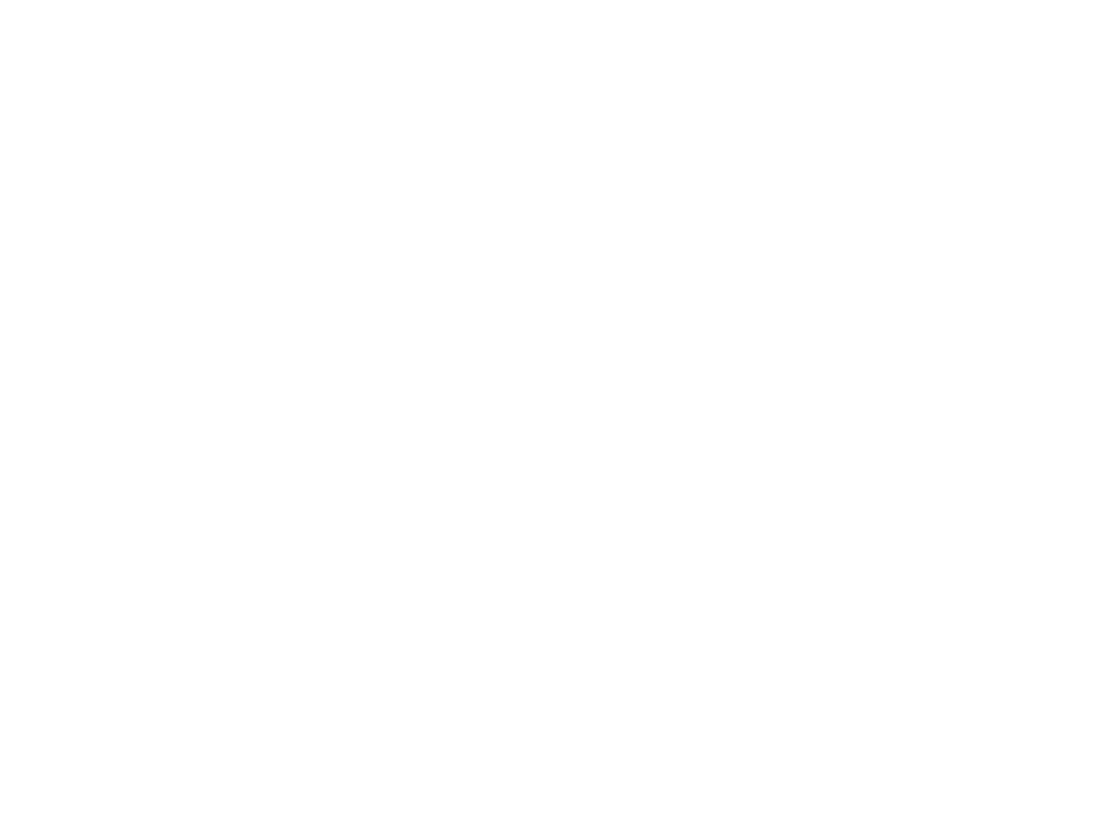

A Jupyter Widget

In [5]:
# interactive widget for 2D box
# Allows us to go frame by frame.
# It may look like the particles are deforming as they move.  They are not.  That is a artifact
# of the ipython widget & bqplot packages I am using.  This is best used for frame by frame
# analysis.  Use the cell above for good animations.

%run -i program/billiard_defs.py
%run -i program/analysis.py
time_interval = 50  # larger <-> slower
%matplotlib inline
interactive_2d_box(time_interval)